## 141B Lecture 12

## Data Munging


## US College Scorecard data

- national college scorecard dataset: https://collegescorecard.ed.gov/data/ 
- dataset is a large comparison of accredited colleges and universities in the U.S

> The College Scorecard is designed to increase transparency, putting the power in the hands of the public — from those choosing colleges to those improving college quality — to see how well different schools are serving their students.

In [1]:
import pandas as pd
import numpy as np

datadir = "data"

In [2]:
!ls -la data

total 5201596
drwxrwxr-x 3 phileas phileas      4096 Oct 18 11:38 .
drwxrwxr-x 4 phileas phileas      4096 Oct 19 16:32 ..
-rw-rw-r-- 1 phileas phileas 391592882 Aug  2 15:57 CollegeScorecard_Raw_Data_08032021.zip
-rw-r--r-- 1 phileas phileas  39382166 Jul 15 16:41 Crosswalks.zip
-rw-r--r-- 1 phileas phileas    583793 Jul 19 19:00 data.yaml
-rw-r--r-- 1 phileas phileas 279769389 Jul 19 09:02 FieldOfStudyData1415_1516_PP.csv
-rw-r--r-- 1 phileas phileas 291199519 Jul 19 09:03 FieldOfStudyData1516_1617_PP.csv
-rw-r--r-- 1 phileas phileas 390773724 Jul 19 09:03 FieldOfStudyData1617_1718_PP.csv
drwxrwxr-x 2 phileas phileas      4096 Oct 18 11:38 __MACOSX
-rw-r--r-- 1 phileas phileas  79838455 Jul 19 09:03 MERGED1996_97_PP.csv
-rw-r--r-- 1 phileas phileas  83415578 Jul 19 09:03 MERGED1997_98_PP.csv
-rw-r--r-- 1 phileas phileas  93754499 Jul 19 09:03 MERGED1998_99_PP.csv
-rw-r--r-- 1 phileas phileas 107099258 Jul 19 09:03 MERGED1999_00_PP.csv
-rw-r--r-- 1 phileas phileas 120479091 Jul 19 09:

### Pandas I/O

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="12%" />
<col width="40%" />
<col width="24%" />
<col width="24%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Format Type</th>
<th class="head">Data Description</th>
<th class="head">Reader</th>
<th class="head">Writer</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></td>
<td><a class="reference internal" href="#io-read-csv-table"><span class="std std-ref">read_csv</span></a></td>
<td><a class="reference internal" href="#io-store-in-csv"><span class="std std-ref">to_csv</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td><a class="reference external" href="http://www.json.org/">JSON</a></td>
<td><a class="reference internal" href="#io-json-reader"><span class="std std-ref">read_json</span></a></td>
<td><a class="reference internal" href="#io-json-writer"><span class="std std-ref">to_json</span></a></td>
</tr>
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></td>
<td><a class="reference internal" href="#io-read-html"><span class="std std-ref">read_html</span></a></td>
<td><a class="reference internal" href="#io-html"><span class="std std-ref">to_html</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td>Local clipboard</td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">read_clipboard</span></a></td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">to_clipboard</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></td>
<td><a class="reference internal" href="#io-excel-reader"><span class="std std-ref">read_excel</span></a></td>
<td><a class="reference internal" href="#io-excel-writer"><span class="std std-ref">to_excel</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">read_hdf</span></a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">to_hdf</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">read_feather</span></a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">to_feather</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">read_parquet</span></a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">to_parquet</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="http://msgpack.org/index.html">Msgpack</a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">read_msgpack</span></a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">to_msgpack</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></td>
<td><a class="reference internal" href="#io-stata-reader"><span class="std std-ref">read_stata</span></a></td>
<td><a class="reference internal" href="#io-stata-writer"><span class="std std-ref">to_stata</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a></td>
<td><a class="reference internal" href="#io-sas-reader"><span class="std std-ref">read_sas</span></a></td>
<td>&#160;</td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">read_pickle</span></a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">to_pickle</span></a></td>
</tr>
<tr class="row-even"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">read_sql</span></a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">to_sql</span></a></td>
</tr>
<tr class="row-odd"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google Big Query</a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">read_gbq</span></a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">to_gbq</span></a></td>
</tr>
</tbody>
</table>

* from https://pandas.pydata.org/pandas-docs/stable/io.html

### Practice munging on a subset of data

- for multiple moderate data files, read in one practice munging
- for a single large CSV, HDF5, SQL database, etc. read it in chunks (later).  
- anticipate curveballs with linux tools

In [3]:
# read in the 2009 data
COL = pd.read_csv(datadir + '/MERGED2009_10_PP.csv')

/home/phileas/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,6,1351,1365,1377,1378,1407,1408,1411,1426,1431,1432,1433,1445,1446,1447,1461,1489,1537,1538,1539,1540,1541,1542,1547,1548,1549,1553,1554,1559,1560,1561,1562,1563,1567,1568,1571,1572,1573,1574,1606,1609,1610,1611,1613,1614,1615,1616,1636,1637,1711,1723,1724,1729,1909,1910,1911,1912,1913) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
COL.head() # look at the top 5 rows

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,FEDSCHCD,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM,ENDOWBEGIN,ENDOWEND,DOLPROVIDER
0,100636,1230800,12308,Community College of the Air Force,Montgomery,AL,36114-3011,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,1800.0,5350.0,2080.0,5350.0,2080.0,1300.0,NaN,NaN,NaN
2,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,1000.0,8969.0,4050.0,8969.0,4050.0,4050.0,330920594.0,326256324.0,NaN
3,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,1500.0,NaN,NaN,9600.0,1600.0,1600.0,174805.0,174805.0,NaN
4,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,1542.0,7208.0,3957.0,NaN,NaN,NaN,55880886.0,53895740.0,NaN


In [5]:
type(COL) # Pandas is built around DataFrame

pandas.core.frame.DataFrame

In [6]:
COL.dtypes # see the types of columns

UNITID                int64
OPEID                object
OPEID6                int64
INSTNM               object
CITY                 object
                     ...   
OTHEREXPENSE_OFF    float64
OTHEREXPENSE_FAM    float64
ENDOWBEGIN          float64
ENDOWEND            float64
DOLPROVIDER         float64
Length: 2392, dtype: object

In [7]:
# Let's explore the DataFrame
COL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7217 entries, 0 to 7216
Columns: 2392 entries, UNITID to DOLPROVIDER
dtypes: float64(1175), int64(11), object(1206)
memory usage: 131.7+ MB


In [8]:
COL.describe() # some stats

,UNITID,OPEID6,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,...,FEDSCHCD,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM,ENDOWBEGIN,ENDOWEND,DOLPROVIDER
count,7.217000e+03,7217.000000,0.0,0.0,0.0,7078.000000,0.0,7217.000000,7217.000000,7217.000000,...,0.0,4170.000000,2010.000000,2017.000000,3470.000000,3470.000000,3470.000000,2.788000e+03,2.788000e+03,0.0
mean,8.739853e+05,14789.356519,NaN,NaN,NaN,1.964397,NaN,0.787031,4.026050,1.873355,...,NaN,1138.897842,7536.891045,2813.018840,8027.356772,3895.888473,4098.601729,1.431899e+08,1.116878e+08,NaN
std,3.710622e+06,12558.215963,NaN,NaN,NaN,0.885809,NaN,0.409435,11.171766,1.001540,...,NaN,789.287983,2534.772097,1409.798633,2989.916784,2098.182124,2248.782466,1.059975e+09,7.807512e+08,NaN
min,1.006360e+05,1002.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN
25%,1.651120e+05,3285.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,...,NaN,900.000000,5958.500000,1818.000000,6120.000000,2600.000000,2700.000000,1.616152e+06,1.585383e+06,NaN
50%,2.154240e+05,10052.000000,NaN,NaN,NaN,2.000000,NaN,1.000000,1.000000,2.000000,...,NaN,1100.000000,7496.000000,2748.000000,7791.500000,3627.000000,3654.000000,8.996077e+06,8.045339e+06,NaN
75%,4.193410e+05,23616.000000,NaN,NaN,NaN,3.000000,NaN,1.000000,2.000000,3.000000,...,NaN,1400.000000,9122.500000,3512.000000,9763.000000,4757.250000,5025.000000,4.142574e+07,3.357602e+07,NaN
max,4.497000e+07,41552.000000,NaN,NaN,NaN,3.000000,NaN,1.000000,74.000000,4.000000,...,NaN,28000.000000,19400.000000,12400.000000,26148.000000,14400.000000,18861.000000,3.692669e+10,2.603539e+10,NaN


In [9]:
COL.columns # DataFrames have columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'FEDSCHCD', 'BOOKSUPPLY', 'ROOMBOARD_ON', 'OTHEREXPENSE_ON',
       'ROOMBOARD_OFF', 'OTHEREXPENSE_OFF', 'OTHEREXPENSE_FAM', 'ENDOWBEGIN',
       'ENDOWEND', 'DOLPROVIDER'],
      dtype='object', length=2392)

In [10]:
COL.index # and row indices

RangeIndex(start=0, stop=7217, step=1)

In [11]:
COL = COL.set_index('UNITID') # set index variable
COL.head()

,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,...,FEDSCHCD,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM,ENDOWBEGIN,ENDOWEND,DOLPROVIDER
UNITID,,,,,,,,,,,,,,,,,,,,,
100636,1230800,12308,Community College of the Air Force,Montgomery,AL,36114-3011,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,3.0,...,NaN,1800.0,5350.0,2080.0,5350.0,2080.0,1300.0,NaN,NaN,NaN
100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,3.0,...,NaN,1000.0,8969.0,4050.0,8969.0,4050.0,4050.0,330920594.0,326256324.0,NaN
100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,3.0,...,NaN,1500.0,NaN,NaN,9600.0,1600.0,1600.0,174805.0,174805.0,NaN
100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,3.0,...,NaN,1542.0,7208.0,3957.0,NaN,NaN,NaN,55880886.0,53895740.0,NaN


In [12]:
enroll = COL['UGDS'] # DataFrame acts like dictionary from column names to columns
type(enroll) # columns are Series

pandas.core.series.Series

In [13]:
enroll.dtypes # the dtype of the series

dtype('float64')

In [14]:
enroll[:6] # Series slices like an array

UNITID
100636        0.0
100654     4483.0
100663    10265.0
100690      389.0
100706     5956.0
100724     4638.0
Name: UGDS, dtype: float64

In [15]:
enroll[100654] # Series acts like a dictionary from index to value

4483.0

In [16]:
enroll[[100654,100751]] # list indices are keys

UNITID
100654     4483.0
100751    23296.0
Name: UGDS, dtype: float64

In [17]:
enroll.shape

(7217,)

In [18]:
enroll.describe()

count      6649.000000
mean       2484.897579
std        5688.903697
min           0.000000
25%         138.000000
50%         611.000000
75%        2233.000000
max      235028.000000
Name: UGDS, dtype: float64

### Series statistics

- `mean, min, max, std, count`

In [19]:
enroll.mean()

2484.8975785832454

In [20]:
enroll.count()

6649

In [21]:
def read_enroll_data(year,datadir):
    """read a CollegeScorecard enrollment"""
    nextyr = str(int(year) + 1)[-2:]
    filename = datadir + '/MERGED{}_{}_PP.csv'.format(year,nextyr)
    col = pd.read_csv(filename,dtype={'UNITID':np.int64,'UGDS':np.float64},usecols=['UNITID','UGDS'])
    col = col.set_index('UNITID')
    return col['UGDS']

In [22]:
ENR_list = [read_enroll_data(year,datadir) for year in range(2000,2010)] # read these years

In [23]:
[len(enr) for enr in ENR_list] # amount of data

[6654, 6725, 6652, 6673, 6747, 6899, 6951, 6971, 7055, 7217]

In [24]:
[enr.count() for enr in ENR_list] # count the number of NAs

[0, 6362, 6300, 6361, 6318, 6388, 6441, 6454, 6544, 6649]

In [25]:
enr_01_02, enr_02_03 = ENR_list[1:3] 
enr_01_03 = enr_01_02 + enr_02_03 # add two Series of different length and NAs

In [26]:
enr_nna = enr_02_03[~enr_02_03.isna()] # common form of boolean indexing
enr_nna2 = enr_02_03.dropna() # does the same

### Series operations

- Comparing elements of series is based on the index not the row number
- `series.add, div, gt, lt, ne`
- Time series index lets you do differencing (diff), rolling window transform (rolling)
- Many other series operations: https://pandas.pydata.org/pandas-docs/version/0.22/api.html#series


### DataFrames

A DataFrame is...
- a dictionary of Series,
- an array (access positions with `.iloc`),
- a dictionary of rows (access rows with `.loc`),
- a time series (if indexing by Datetime) 

Tidy data principle: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
- rows = observations
- columns = variables

In [27]:
# Which columns have no NAs
col_dna = COL.dropna(axis=1)
col_dna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7217 entries, 100636 to 44970003
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OPEID      7217 non-null   object
 1   OPEID6     7217 non-null   int64 
 2   INSTNM     7217 non-null   object
 3   CITY       7217 non-null   object
 4   STABBR     7217 non-null   object
 5   ZIP        7217 non-null   object
 6   MAIN       7217 non-null   int64 
 7   NUMBRANCH  7217 non-null   int64 
 8   PREDDEG    7217 non-null   int64 
 9   HIGHDEG    7217 non-null   int64 
 10  CONTROL    7217 non-null   int64 
 11  ST_FIPS    7217 non-null   int64 
 12  REGION     7217 non-null   int64 
 13  ICLEVEL    7217 non-null   int64 
 14  OPEFLAG    7217 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 1.1+ MB


In [28]:
col_dna[['INSTNM','HIGHDEG']].head() # access columns

,INSTNM,HIGHDEG
UNITID,,
100636,Community College of the Air Force,2
100654,Alabama A & M University,4
100663,University of Alabama at Birmingham,4
100690,Amridge University,4
100706,University of Alabama in Huntsville,4


In [29]:
col_dna.loc[[100654,100830]] # access rows from indices with loc

,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ICLEVEL,OPEFLAG
UNITID,,,,,,,,,,,,,,,
100654,100200,1002,Alabama A & M University,Normal,AL,35762,1,1,3,4,1,1,5,1,1
100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,1,1,3,4,1,1,5,1,1


In [30]:
## the following should be used only in an emergency!

col_dna.iloc[:10,:5] # access elements like an array with iloc

,OPEID,OPEID6,INSTNM,CITY,STABBR
UNITID,,,,,
100636,1230800,12308,Community College of the Air Force,Montgomery,AL
100654,100200,1002,Alabama A & M University,Normal,AL
100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL
100690,2503400,25034,Amridge University,Montgomery,AL
100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL
100724,100500,1005,Alabama State University,Montgomery,AL
100751,105100,1051,The University of Alabama,Tuscaloosa,AL
100760,100700,1007,Central Alabama Community College,Alexander City,AL
100812,100800,1008,Athens State University,Athens,AL


In [31]:
col_dna.dtypes # access dtypes

OPEID        object
OPEID6        int64
INSTNM       object
CITY         object
STABBR       object
ZIP          object
MAIN          int64
NUMBRANCH     int64
PREDDEG       int64
HIGHDEG       int64
CONTROL       int64
ST_FIPS       int64
REGION        int64
ICLEVEL       int64
OPEFLAG       int64
dtype: object

In [32]:
#type(col_dna)
#col_dna.dtypes.replace(np.dtype('int64'),np.dtype('float64')) # dtypes is a Series!
col_dna.dtypes.replace({np.dtype('int64'):np.dtype('float64')})

OPEID         object
OPEID6       float64
INSTNM        object
CITY          object
STABBR        object
ZIP           object
MAIN         float64
NUMBRANCH    float64
PREDDEG      float64
HIGHDEG      float64
CONTROL      float64
ST_FIPS      float64
REGION       float64
ICLEVEL      float64
OPEFLAG      float64
dtype: object

In [33]:
col_dtypes = dict(col_dna.dtypes.replace({np.dtype('int64'):np.dtype('float64')})) # make the dtypes floats
col_dtypes['UNITID'] = np.dtype('int64') # convert the UNITID back to int
vars_interest = ['ADM_RATE','UGDS','TUITIONFEE_IN','TUITIONFEE_OUT','MN_EARN_WNE_P10'] # Include these vars
col_dtypes.update({a: np.dtype('float64') for a in vars_interest}) # make them floats

In [34]:
## Try reading it with these dtypes
col_try_again = pd.read_csv(datadir + '/MERGED2009_10_PP.csv',
                            dtype=col_dtypes,usecols=col_dtypes.keys())

## ValueError: could not convert string to float: 'PrivacySuppressed'

ValueError: could not convert string to float: 'PrivacySuppressed'

In [35]:
## Try reading it again
col_try_again = pd.read_csv(datadir + '/MERGED2009_10_PP.csv',na_values='PrivacySuppressed',
                            dtype=col_dtypes,usecols=col_dtypes.keys())
col_try_again.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7217 entries, 0 to 7216
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           7217 non-null   int64  
 1   OPEID            7217 non-null   object 
 2   OPEID6           7217 non-null   float64
 3   INSTNM           7217 non-null   object 
 4   CITY             7217 non-null   object 
 5   STABBR           7217 non-null   object 
 6   ZIP              7217 non-null   object 
 7   MAIN             7217 non-null   float64
 8   NUMBRANCH        7217 non-null   float64
 9   PREDDEG          7217 non-null   float64
 10  HIGHDEG          7217 non-null   float64
 11  CONTROL          7217 non-null   float64
 12  ST_FIPS          7217 non-null   float64
 13  REGION           7217 non-null   float64
 14  ADM_RATE         2794 non-null   float64
 15  UGDS             6649 non-null   float64
 16  TUITIONFEE_IN    4289 non-null   float64
 17  TUITIONFEE_OUT

In [36]:
col_try_again['Year'] = pd.Period('2010',freq='Y') # more discussion about time series in book

In [37]:
col_try_again.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,...,ST_FIPS,REGION,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,ICLEVEL,OPEFLAG,Year
0,100636,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,...,1.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0,3.0,2010
1,100654,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,...,1.0,5.0,0.4726,4483.0,4692.0,8638.0,36600.0,1.0,1.0,2010
2,100663,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,1.0,3.0,...,1.0,5.0,0.8357,10265.0,5096.0,11432.0,48500.0,1.0,1.0,2010
3,100690,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,...,1.0,5.0,0.8750,389.0,8000.0,8000.0,42800.0,1.0,1.0,2010
4,100706,00105500,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,1.0,1.0,3.0,...,1.0,5.0,0.7209,5956.0,6510.0,15628.0,51900.0,1.0,1.0,2010


In [38]:
y = col_try_again['Year'][0]
y.to_timestamp() # convert Period to Timestamp

Timestamp('2010-01-01 00:00:00')

In [39]:
y.start_time # Start time of period - not optimal

Timestamp('2010-01-01 00:00:00')

In [40]:
y.end_time # End time of period - not optimal

Timestamp('2010-12-31 23:59:59.999999999')

In [41]:
## Apply what we learned to all data files

def read_cs_data(year,col_dtypes,datadir):
    """read a CollegeScorecard dataframe"""
    nextyr = str(int(year) + 1)[-2:]
    filename = datadir + '/MERGED{}_{}_PP.csv'.format(year,nextyr)
    col = pd.read_csv(filename,na_values='PrivacySuppressed',
                      dtype=col_dtypes,usecols=col_dtypes.keys())
    col['Year'] = pd.Period(str(int(year) + 1),freq='Y')
    return col

In [42]:
## pd.concat stacks DataFrames (append rows)

col = pd.concat((read_cs_data(str(y),col_dtypes,datadir) for y in range(1996,2017))) # gen exp
col = col.set_index(['UNITID','Year']) # set multi index

In [43]:
col.head()

,,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,ICLEVEL,OPEFLAG
UNITID,Year,,,,,,,,,,,,,,,,,,,,
100636,1997,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,44141.0,NaN,NaN,NaN,2.0,1.0
100654,1997,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,1.0,1.0,5.0,NaN,3852.0,NaN,NaN,NaN,1.0,1.0
100663,1997,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,2.0,3.0,4.0,1.0,1.0,5.0,NaN,9889.0,NaN,NaN,NaN,1.0,1.0
100672,1997,00574900,5749.0,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,1.0,1.0,1.0,2.0,1.0,1.0,5.0,NaN,295.0,NaN,NaN,NaN,2.0,1.0
100690,1997,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,2.0,1.0,5.0,NaN,60.0,NaN,NaN,NaN,1.0,1.0


In [44]:
## Find UC Davis

col_large = col[col['UGDS'] > 1000] # Filter with boolean indexing
davis = col_large.query('CITY=="Davis" and STABBR=="CA"') # .query finds rows satisfying expression
davis = davis.reset_index(level=0) # access index via level

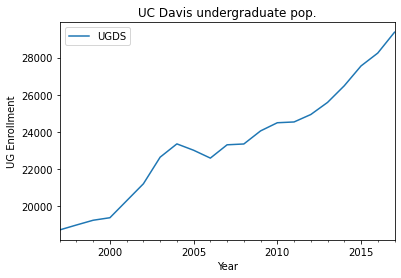

In [45]:
## Plot davis
import matplotlib.pyplot as plt

ax = davis.plot(y='UGDS') # dataframe.plot()!
ax.set_title('UC Davis undergraduate pop.')
ax.set_ylabel('UG Enrollment')
plt.show()